<a href="https://colab.research.google.com/github/BuddhikaRoshan/DL-Assignment/blob/Buddhika/DL_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**This notebook loads a chest X-ray dataset of lung cancer images, preprocesses and splits it into training and validation sets, and uses DenseNet121 with transfer learning for classification. The model is trained on the data, evaluated for accuracy, and saved for future use.**

# **environment & imports**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn import metrics

from zipfile import ZipFile
import cv2
import gc
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers, applications, models

import warnings
warnings.filterwarnings('ignore')


# Extract dataset

In [5]:
data_path = '/content/drive/MyDrive/lung_images.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')

path = 'lung_images'
classes = ['lung_n', 'lung_aca']

The data set has been extracted.


# Visualize sample images

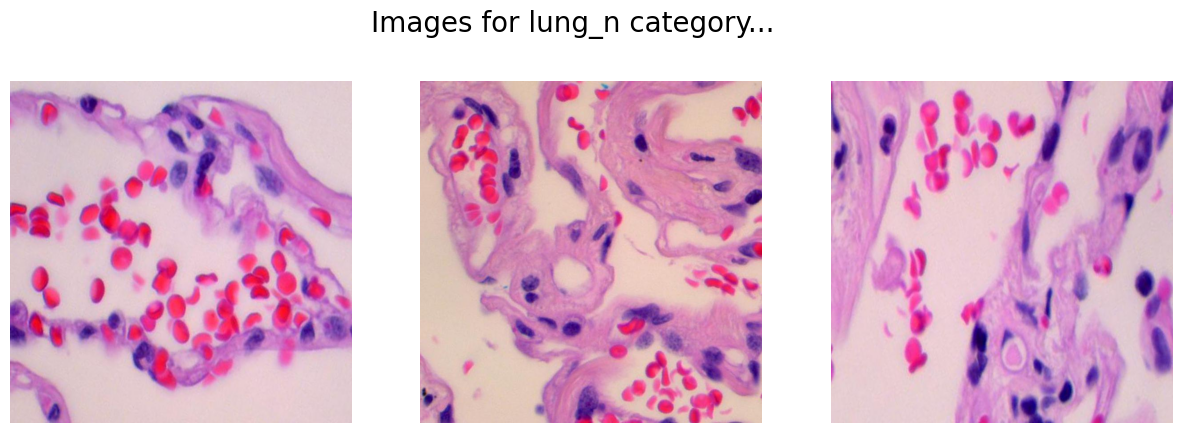

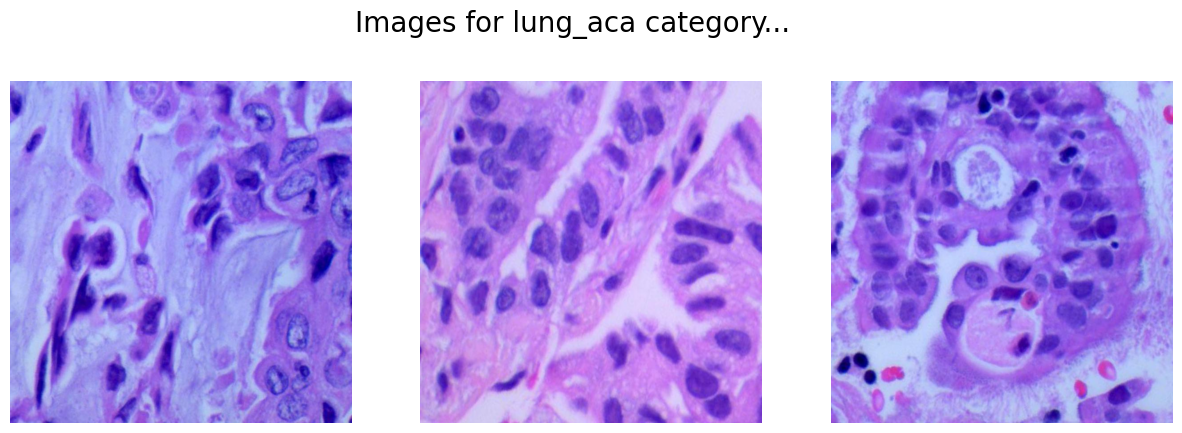

In [6]:
for cat in classes:
    image_dir = f'{path}/{cat}'
    images = os.listdir(image_dir)

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Images for {cat} category...', fontsize=20)

    for i in range(3):
        k = np.random.randint(0, len(images))
        img = np.array(Image.open(f'{path}/{cat}/{images[k]}'))
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()